In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns


#### EN_5BBC_labels

In [52]:
EN5BBC_filepath = '../Data/train/EN_5BBC_labels/bbc-text.csv'

In [53]:
EN5BBC=pd.read_csv(EN5BBC_filepath)

In [54]:
EN5BBC.head()


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [55]:
EN5BBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
category    2225 non-null object
text        2225 non-null object
dtypes: object(2)
memory usage: 34.9+ KB


#### EN_4 _labels

In [56]:
EN4_filepath = '../Data/train/EN_4_labels(CTMH)/train.csv'

In [57]:
EN4=pd.read_csv(EN4_filepath)

In [58]:
EN4.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [59]:
#1 represents World, 2 represents Sports, 3 represents Business and 4 represents Sci/Tech.
def get_label(index_lst):
    label_lst = []
    for x in index_lst:
        if x=='1':
            label_lst.append('World')
        if x=='2':
            label_lst.append('Sports')
        if x=='3':
            label_lst.append('Business')
        if x=='4':
            label_lst.append('Sci/Tech')
    return label_lst
EN4['Label_str'] = get_label(EN4['Class Index'].astype(str))

In [60]:
EN4.head()

,Class Index,Title,Description,Label_str
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business


In [61]:
print(EN4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 4 columns):
Class Index    120000 non-null int64
Title          120000 non-null object
Description    120000 non-null object
Label_str      120000 non-null object
dtypes: int64(1), object(3)
memory usage: 3.7+ MB
None


#### EN_5(H)_labels

In [62]:
EN5H_filepath = os.path.abspath('../Data/train/EN_5H_labels/News.csv')

In [63]:
EN5H=pd.read_csv(EN5H_filepath)

In [64]:
EN5H.head()

,headline,category,authors,short_description
0,There Were 2 Mass Shootings In Texas Last Wee...,CRIME,Melissa Jeltsen,She left her husband. He killed their childre...
1,Will Smith Joins Diplo And Nicky Jam For The ...,ENTERTAINMENT,Andy McDonald,Of course it has a song.
2,Hugh Grant Marries For The First Time At Age ...,ENTERTAINMENT,Ron Dicker,The actor and his longtime girlfriend Anna Eb...
3,Jim Carrey Blasts 'Castrato' Adam Schiff And ...,ENTERTAINMENT,Ron Dicker,The actor gives Dems an ass-kicking for not f...
4,Julianna Margulies Uses Donald Trump Poop Bag...,ENTERTAINMENT,Ron Dicker,The Dietland actress said using the bags is a...


In [65]:
#remove authors column
EN5H_new=EN5H.drop(columns=['authors'])

In [66]:
EN5H_new.head()

,headline,category,short_description
0,There Were 2 Mass Shootings In Texas Last Wee...,CRIME,She left her husband. He killed their childre...
1,Will Smith Joins Diplo And Nicky Jam For The ...,ENTERTAINMENT,Of course it has a song.
2,Hugh Grant Marries For The First Time At Age ...,ENTERTAINMENT,The actor and his longtime girlfriend Anna Eb...
3,Jim Carrey Blasts 'Castrato' Adam Schiff And ...,ENTERTAINMENT,The actor gives Dems an ass-kicking for not f...
4,Julianna Margulies Uses Donald Trump Poop Bag...,ENTERTAINMENT,The Dietland actress said using the bags is a...


##### EN5BBC Categories

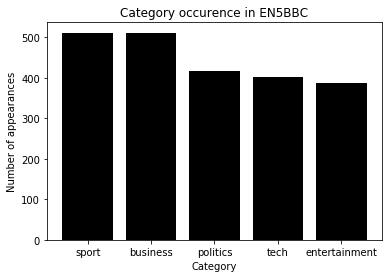

In [67]:
#defining the desired column as a variable
categories5bbc=EN5BBC['category']
#create a dict with number of occurences
occurence=categories5bbc.value_counts().to_dict()
plt.bar(occurence.keys(), occurence.values(), color='black')
plt.title('Category occurence in EN5BBC')
plt.xlabel('Category')
plt.ylabel('Number of appearances')
plt.show()

##### EN4 Categories

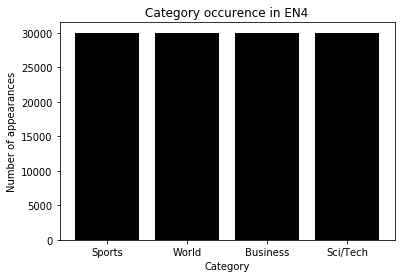

In [68]:
#### defining the desired column as a variable
categories4=EN4['Label_str']
#create a dict with number of occurences
occurence=categories4.value_counts().to_dict()
plt.bar(occurence.keys(), occurence.values(), color='black')
plt.title('Category occurence in EN4')
plt.xlabel('Category')
plt.ylabel('Number of appearances')
plt.show()

##### EN5H

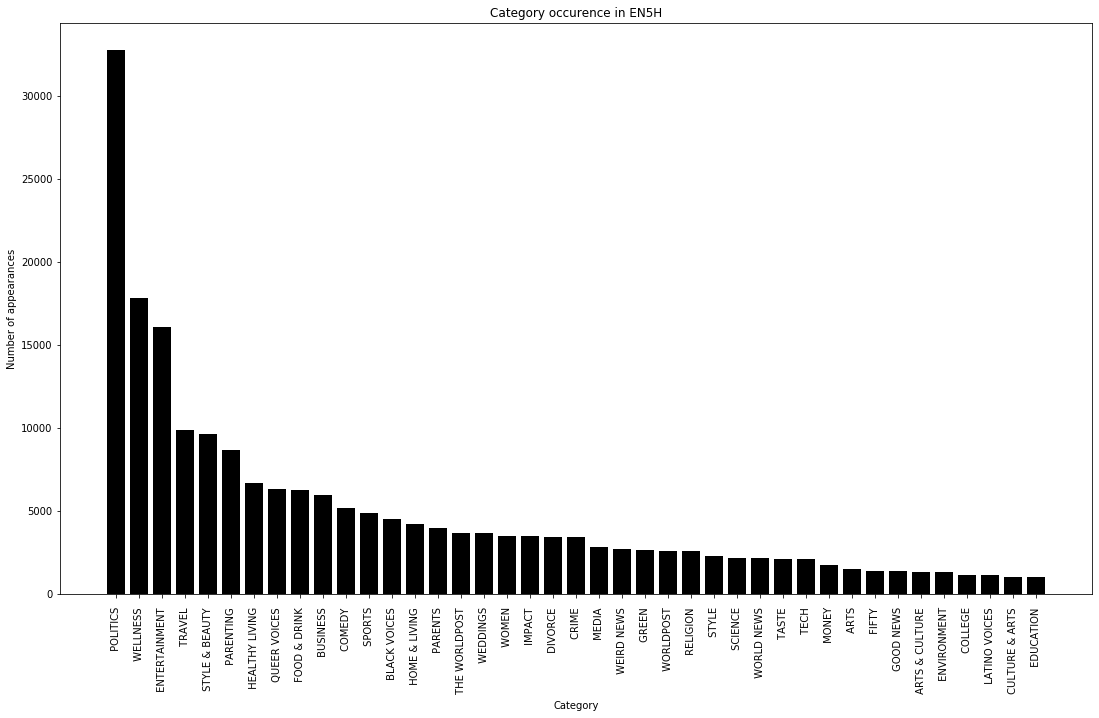

In [69]:
#### defining the desired column as a variable
categories5H=EN5H['category']
#create a dict with number of occurences
occurence5H=categories5H.value_counts().to_dict()
plt.bar(occurence5H.keys(), occurence5H.values(), color='black')
plt.title('Category occurence in EN5H')
plt.xlabel('Category')
plt.ylabel('Number of appearances')
plt.xticks(rotation=90)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

#### Adding some features

##### EN5BBC New Columns

In [71]:
EN5BBC['words_num']= EN5BBC['text'].str.split().str.len()
EN5BBC['len_tot']= EN5BBC['text'].str.len()
EN5BBC['words_len_med'] = EN5BBC['text'].str.len()/EN5BBC['words_num']
EN5BBC['words_num_norm'] = (EN5BBC['words_num'] - EN5BBC['words_num'].min())/(EN5BBC['words_num'].max()-EN5BBC['words_num'].min())
EN5BBC['words_len_med_norm'] = (EN5BBC['words_len_med'] - EN5BBC['words_len_med'].min())/(EN5BBC['words_len_med'].max()-EN5BBC['words_len_med'].min())
EN5BBC['words_num_norm'] = (EN5BBC['words_num'] - EN5BBC['words_num'].min())/(EN5BBC['words_num'].max()-EN5BBC['words_num'].min())
EN5BBC['words_len_med_norm'] = (EN5BBC['words_len_med'] - EN5BBC['words_len_med'].min())/(EN5BBC['words_len_med'].max()-EN5BBC['words_len_med'].min())

In [72]:
EN5BBC.head()

,category,text,words_num,len_tot,words_len_med,words_num_norm,words_len_med_norm
0,tech,tv future in the hands of viewers with home th...,737,4333,5.879240,0.146979,0.438746
1,business,worldcom boss left books alone former worldc...,300,1842,6.140000,0.047706,0.570342
2,sport,tigers wary of farrell gamble leicester say ...,246,1342,5.455285,0.035438,0.224792
3,sport,yeading face newcastle in fa cup premiership s...,341,2176,6.381232,0.057020,0.692082
4,entertainment,ocean s twelve raids box office ocean s twelve...,260,1579,6.073077,0.038619,0.536568


##### EN4 New Columns

In [73]:
EN4['words_num']= EN4['Description'].str.split().str.len()
EN4['len_tot']= EN4['Description'].str.len()
EN4['words_len_med'] = EN4['Description'].str.len()/EN4['words_num']
EN4['words_num_norm'] = (EN4['words_num'] - EN4['words_num'].min())/(EN4['words_num'].max()-EN4['words_num'].min())
EN4['words_len_med_norm'] = (EN4['words_len_med'] - EN4['words_len_med'].min())/(EN4['words_len_med'].max()-EN4['words_len_med'].min())
EN4['words_num_norm'] = (EN4['words_num'] - EN5BBC['words_num'].min())/(EN5BBC['words_num'].max()-EN4['words_num'].min())
EN4['words_len_med_norm'] = (EN4['words_len_med'] - EN4['words_len_med'].min())/(EN4['words_len_med'].max()-EN4['words_len_med'].min())

In [74]:
EN4.head()

,Class Index,Title,Description,Label_str,words_num,len_tot,words_len_med,words_num_norm,words_len_med_norm
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business,12,94,7.833333,-0.017368,0.119701
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business,30,214,7.133333,-0.013360,0.097226
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business,29,184,6.344828,-0.013583,0.071908
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business,27,195,7.222222,-0.014028,0.100080
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business,24,160,6.666667,-0.014696,0.082242


##### EN5BBC Box Plot

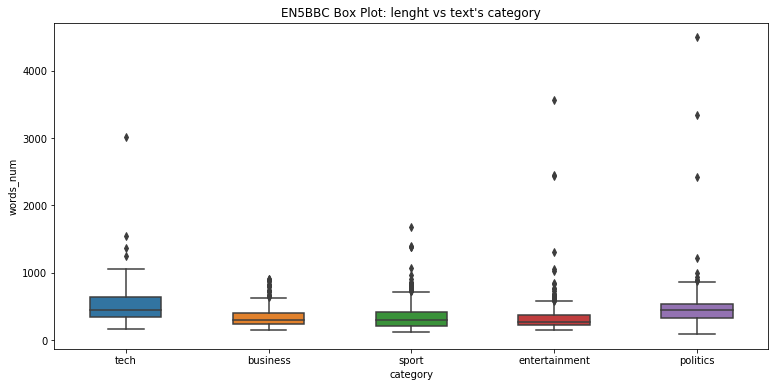

In [75]:
plt.figure(figsize=(12.8,6))
plt.title("EN5BBC Box Plot: lenght vs text's category")
sns.boxplot(data=EN5BBC, x='category', y='words_num', width=.5);

##### EN4 Box Plot

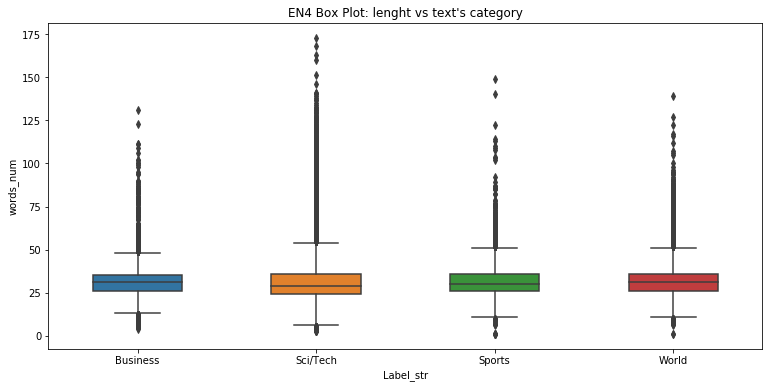

In [76]:
plt.figure(figsize=(12.8,6))
plt.title("EN4 Box Plot: lenght vs text's category")
sns.boxplot(data=EN4, x='Label_str', y='words_num', width=.5);

##### EN41 Box Plot

##### News length distribution for EN5BBC

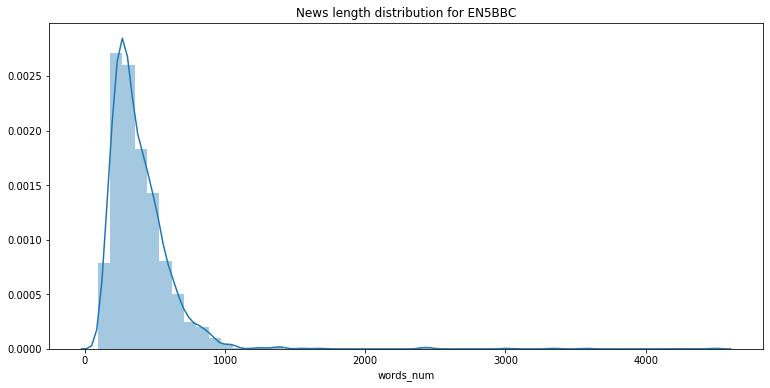

In [77]:
plt.figure(figsize=(12.8,6))
sns.distplot(EN5BBC['words_num']).set_title('News length distribution for EN5BBC');

##### News length distribution for EN4

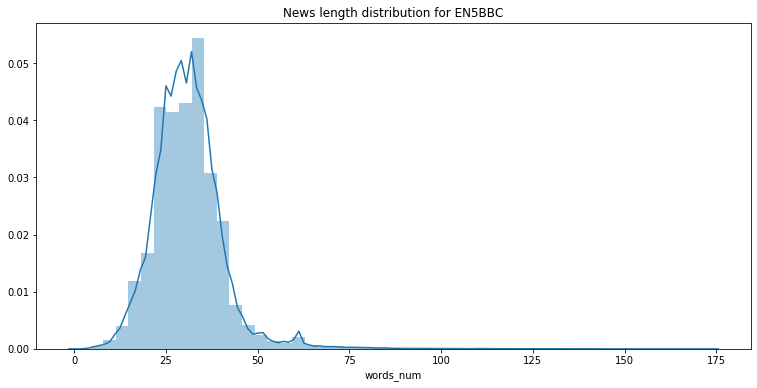

In [78]:
plt.figure(figsize=(12.8,6))
sns.distplot(EN4['words_num']).set_title('News length distribution for EN5BBC');